In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

import gm2
import trfp
import plotting_functions as plt2
import helper_functions as helper

import field_map_config_run1 as map_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
old_df = pd.read_hdf('hdf5/60hr_blochlike_vtms_unblinded_2020-04-15.h5')

new_df = pd.read_hdf('/data2/aetb/2020-09-30_hybrid_maps.h5', key='run_1a1')

print old_df.shape
print new_df.shape

old_azi_df = pd.DataFrame(index=old_df.index)
new_azi_df = pd.DataFrame(index=new_df.index)

weight = trfp.STATION_BARCODE_EDGES[1:] - trfp.STATION_BARCODE_EDGES[:-1]
weight[2] = weight[2] + 360

for m in range(5):
    stms = ['st'+str(st)+',m'+str(m+1) for st in range(72)]
    old_azi_df['m'+str(m+1)] = old_df[stms].dot(weight)/360
    new_azi_df['m'+str(m+1)] = new_df[stms].dot(weight)/360

(257281, 432)
(257281, 648)


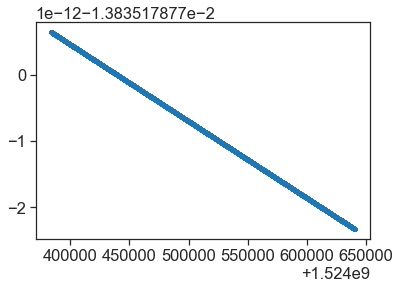

In [5]:
plt.plot(new_azi_df['m2']/61.79 - old_azi_df['m2']/61.79, '.')

In [11]:
np.dot(trfp.THETA_TR, np.array(trfp.PLUNGING_PROBE_CALIBRATIONS)-np.array(trfp.geometry.PLUNGING_PROBE_CALIBRATIONS_OLD))/61.79

array([-1.63589864e+00, -1.38351788e-02, -8.51277258e-03,  3.35752853e-02,
       -4.22903594e-03,  9.23548066e-03,  4.45435659e-03,  1.94603382e-02,
       -3.24969170e-02,  6.49793763e-02, -1.70788927e+00,  1.10268384e-03,
        0.00000000e+00, -1.01643437e-01, -2.80652562e+00,  0.00000000e+00,
        0.00000000e+00])